In [3]:
import pandas as pd
import numpy as np

import os
import math

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.models import Model
from keras.layers import Input, Activation
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
#auto keras is a library to automatically choose the model structure, still early version
#import autokeras as ak

from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline

import cv2
from tqdm import tqdm, tqdm_notebook

In [2]:
train_dir = "train"
test_dir = "test"
train_df = pd.read_csv('train.csv')

def read_train_data():
    features = []
    target = []
    images = train_df['id'].values
    for img_id in tqdm_notebook(images):
        features.append(cv2.imread(train_dir + "/" + img_id))    
        target.append(train_df[train_df['id'] == img_id]['has_cactus'].values[0])  

    features = np.asarray(features)
    features = features.astype('float32')
    features /= 255
    target = np.asarray(target)
    return features, target

X_train, y_train = read_train_data()

In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 15,241,025
Trainable params: 526,337
Non-trainable params: 14,714,688
_________________________________________________________________


Instructions for updating:
Use tf.cast instead.
Train on 15750 samples, validate on 1750 samples
Epoch 1/5
15750/15750 [==============================] - 74s 5ms/step - loss: 0.1474 - acc: 0.9417 - val_loss: 0.1811 - val_acc: 0.9257
Epoch 2/5
15750/15750 [==============================] - 98s 6ms/step - loss: 0.1055 - acc: 0.9599 - val_loss: 0.0824 - val_acc: 0.9663
Epoch 3/5
15750/15750 [==============================] - 47s 3ms/step - loss: 0.0939 - acc: 0.9646 - val_loss: 0.0863 - val_acc: 0.9680
Epoch 4/5
15750/15750 [==============================] - 47s 3ms/step - loss: 0.0898 - acc: 0.9662 - val_loss: 0.0736 - val_acc: 0.9731
Epoch 5/5
15750/15750 [==============================] - 47s 3ms/step - loss: 0.0834 - acc: 0.9683 - val_loss: 0.0748 - val_acc: 0.9691


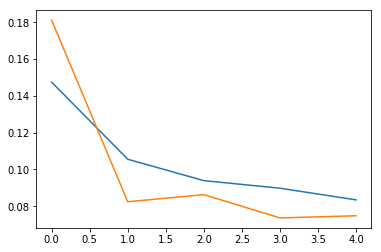

In [9]:
training = model.fit(X_train, y_train, validation_split=0.1, epochs=5)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.show()